In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# Load the data
debate_df=pd.read_csv("debate.csv")

In [3]:
debate_df.info

<bound method DataFrame.info of      Unnamed: 0                   TOPIC speaker  \
0             1     TOPIC: Introduction  WELKER   
1             2         TOPIC: COVID-19  WELKER   
2             3         TOPIC: COVID-19   TRUMP   
3             4         TOPIC: COVID-19  WELKER   
4             5         TOPIC: COVID-19   BIDEN   
..          ...                     ...     ...   
348         349  TOPIC: Final Question   WELKER   
349         350  TOPIC: Final Question    TRUMP   
350         351  TOPIC: Final Question   WELKER   
351         352  TOPIC: Final Question    BIDEN   
352         353  TOPIC: Final Question   WELKER   

                                                speech  
0     A very good evening to both of you. This deba...  
1     And we will begin with the fight against the ...  
2     So, as you know, more 2.2 million people, mod...  
3     OK, former Vice President Biden, to you, how ...  
4     220,000 Americans dead. If you hear nothing e...  
..           

In [4]:

debate_df=debate_df.drop(debate_df.columns[0],axis=1)
debate_df['length']=debate_df['speech'].apply(len)
debate_df



,TOPIC,speaker,speech,length
0,TOPIC: Introduction,WELKER,A very good evening to both of you. This deba...,657
1,TOPIC: COVID-19,WELKER,And we will begin with the fight against the ...,486
2,TOPIC: COVID-19,TRUMP,"So, as you know, more 2.2 million people, mod...",1961
3,TOPIC: COVID-19,WELKER,"OK, former Vice President Biden, to you, how ...",128
4,TOPIC: COVID-19,BIDEN,"220,000 Americans dead. If you hear nothing e...",1614
...,...,...,...,...
348,TOPIC: Final Question,WELKER,"This is about leadership, gentlemen, and this...",255
349,TOPIC: Final Question,TRUMP,We have to make our country totally successfu...,1041
350,TOPIC: Final Question,WELKER,"All right. Vice President Biden, same questio...",142
351,TOPIC: Final Question,BIDEN,"I will say, ‘I’m the American president. I re...",968


In [5]:
debate_df.describe()

,length
count,353.000000
mean,275.252125
std,394.674379
min,4.000000
25%,37.000000
50%,87.000000
75%,383.000000
max,2156.000000


In [6]:

debate_df[debate_df['length']==4]['speech']
debate_df[debate_df['length']==2156]['speech'].iloc[0]


" First of all, I've already done something that nobody thought was possible. Through the legislature, I terminated the individual mandate. That is the worst part of Obamacare, as we call it. The individual mandate -- we have to pay a fortune for the privilege of not having to pay for bad health insurance. I terminate it; it's gone. Now it's in court, because Obamacare is no good. But then I made a decision, ‘Run it as well as you can’ --  to my people, great people -- ‘Run it as well as you can.’ I could have gone the other route and made everybody very unhappy. They ran it. Premiums are down, everything's down. Here's the problem. No matter how well you run it, it's no good. What we'd like to do is terminate it. We have the individual mandate done. I don't know that it's going to work. If we don't win, we will have to run it and we'll have Obamacare, but it will be better run. But it no longer is Obamacare. Because without the individual mandate, it is much different. Pre-existing co

In [7]:
TRUMP_debate_df = debate_df[(debate_df['speaker']=='TRUMP')]
BIDEN_debate_df = debate_df[(debate_df['speaker']=='BIDEN')]

In [8]:
TRUMP_debate_df.describe()

,length
count,123.000000
mean,330.658537
std,443.769469
min,11.000000
25%,44.500000
50%,151.000000
75%,403.000000
max,2156.000000


In [9]:
BIDEN_debate_df.describe()

,length
count,84.000000
mean,451.142857
std,505.732110
min,4.000000
25%,37.750000
50%,329.500000
75%,725.250000
max,1994.000000


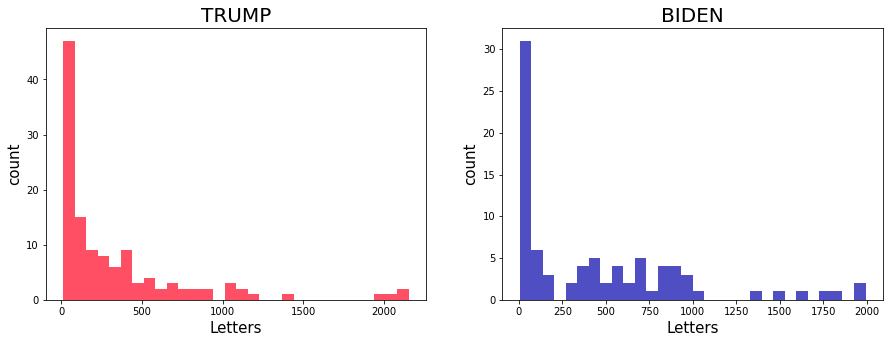

In [10]:
plt.rcParams['figure.figsize'] = (15, 5)

plt.subplot(1, 2, 1)
plt.hist(TRUMP_debate_df['length'], bins=30, color='#ff0422',alpha=0.7)
plt.title('TRUMP', fontsize = 20)
plt.xlabel('Letters', fontsize = 15)
plt.ylabel('count', fontsize = 15)


# checking the Distribution of customers on Weekend
plt.subplot(1, 2, 2)
#sns.countplot(TRUMP_debate_df['length'], palette = 'inferno')
plt.hist(BIDEN_debate_df['length'], bins=30, color='#0504aa',alpha=0.7)
plt.title('BIDEN', fontsize = 20)
plt.xlabel('Letters', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.show()

In [11]:

debate_df['TOPIC']=debate_df['TOPIC'].str.replace('TOPIC: ','')

#debate_df_by_topic = debate_df[debate_df['speaker']=='TRUMP'].groupby(["TOPIC", "speaker"])["length"].sum().reset_index()
debate_df_by_topic_TRUMP = debate_df[debate_df['speaker']=='TRUMP'].groupby(["TOPIC"])["length"].sum().reset_index()
debate_df_by_topic_BIDEN = debate_df[debate_df['speaker']=='BIDEN'].groupby(["TOPIC"])["length"].sum().reset_index()






,TOPIC,length
0,COVID-19,10479
1,Climate Change,5361
2,Economy,6487
3,Final Question,1041
4,Immigration,2388
5,National Security,9153
6,Race in America,5762


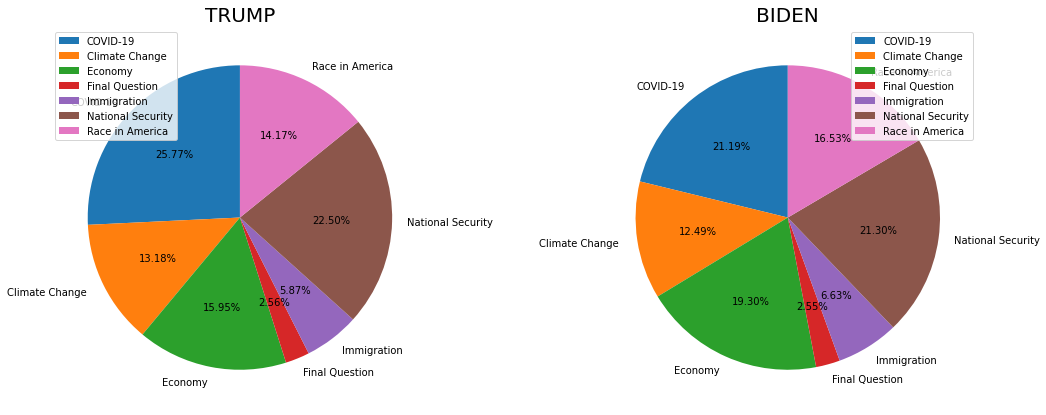

In [12]:
# plotting a pie chart for browsers

plt.rcParams['figure.figsize'] = (18, 7)
plt.subplot(1, 2, 1)
plt.pie(debate_df_by_topic_TRUMP.length,labels=debate_df_by_topic_TRUMP.TOPIC, autopct = '%.2f%%',startangle = 90)
plt.title('TRUMP', fontsize = 20)
plt.axis('off')
plt.legend()

# plotting a pie chart for browsers
plt.subplot(1, 2, 2)
plt.pie(debate_df_by_topic_BIDEN.length,labels=debate_df_by_topic_BIDEN.TOPIC, autopct = '%.2f%%',startangle = 90)
plt.title('BIDEN', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [13]:
TRUMP_COVID19 = debate_df[(debate_df['speaker']=='TRUMP')]
BIDEN_COVID19 = debate_df[(debate_df['speaker']=='BIDEN')]


sentences=BIDEN_COVID19['speech'].to_list()
sentences_as_one_string=" ".join(sentences)
len(sentences_as_one_string)

37979

In [14]:
import nltk
import nltk.data
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

example_sent = "This is a sample sentence, showing off the stop words filtration."

  








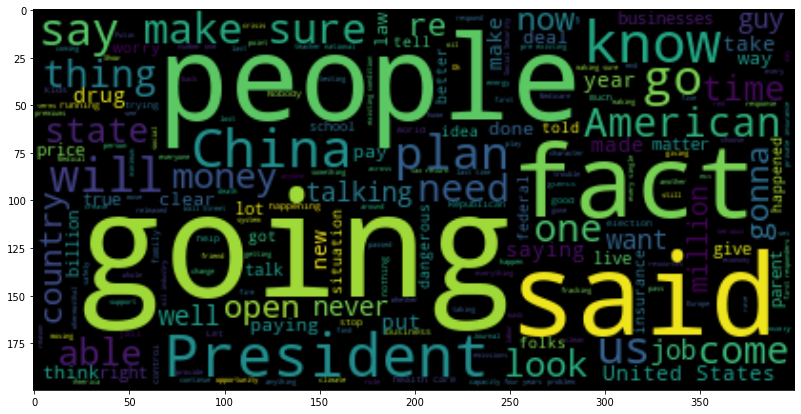

In [15]:
from wordcloud import WordCloud 
wordcloud = WordCloud().generate(sentences_as_one_string)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis()
plt.show()
